# Titanic数据为Titanic号乘客的信息，包括姓名、仓位等级等信息。请结合可视化结3果和统计分析结果，回答以下问题:

## (1) 每个等级的仓库里分别有多少女性和男性乘客? 

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64


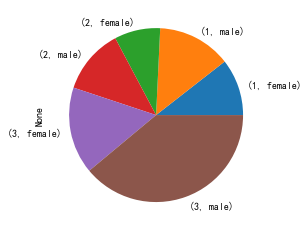

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#解决不显示中文的问题
plt.rcParams['font.sans-serif']=['Simhei']

# 读取csv文件
data_f = r'data\Titanic.csv'
df = pd.read_csv(data_f)

# 按Pclass和Sex进行分组并计算每组大小
result = df.groupby(['Pclass', 'Sex']).size()

# 打印结果
print(result)

# result.plot(kind='bar')
# print('ccc')
result.plot(kind='pie')

## (2) 请问不同等级仓库的乘客，生还情况如何?(5分)是否有显著差别? (10分)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


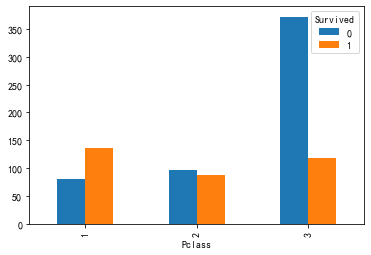

In [31]:
# 生成交叉表,展示不同等级的乘客生还情况
result = pd.crosstab(df.Pclass, df.Survived)

# 打印结果
print(result)

result.plot(kind='bar')

这个输出展示了不同等级仓位的乘客生还情况，其中0代表未生还，1代表生还。例如，一等舱中有1人未生还，2人生还。根据交叉表可以看出，不同等级的乘客生还率存在一定的差异。

为了验证是否存在显著差别，可以使用卡方检验。卡方检验是用来验证样本的观察频数与理论频数是否相符的统计方法。通俗地讲，就是用来检验两个变量之间是否有关联性。

4.549251711298793e-23


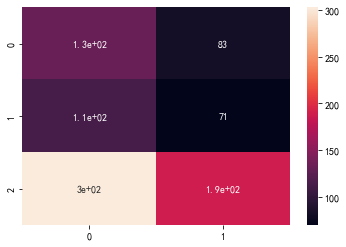

In [32]:
from scipy.stats import chi2_contingency
# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(result)

# 打印p值
print(p)

# 生成热力图
sns.heatmap(expected, annot=True)




p值表示两个变量之间关联性的显著性程度。如果p值小于某个显著性水平（通常为0.05），则可以认为两个变量有显著关联性；否则，不能认为它们之间存在显著关联性。在这个例子中，p值为4.549251711298793e-23小于0.05，因此可以认为不同等级仓库的乘客生还情况存在显著差别。

得到一个热力图，其中x轴表示生还情况（Survived），y轴表示乘客等级（Pclass）。颜色越深表示数值越大。在这里，颜色越深表示该组内预期值越大。
可以根据需要调整图表的属性以及显示方式。例如，也可以使用annot参数控制是否在单元格中显示数值。

## (3)影响乘客生还情况的因素有哪些? (10分)

In [33]:
# 计算皮尔逊相关系数
corr = df.corr()
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Income          0.017046  0.212745 -0.606963  0.243464 -0.060742  0.023631   

                 Fare    Income  
PassengerId  0.012658  0.017046  
Survived     0.257307  0.212745  
Pclass      -0.549500 -0.606963  
Age          0.096067  0.243464  
SibSp        0.159651 -0.060742  
Parch        0.216225  0.023631  
Fare         1.000000  0.307142  
Income       0.307142  1.

Parch  、Fare和Income相关系数为正，有一点的相关性，其中

## (4)基于titanic_passenger_list中的乘客信息，，1-891号乘客的国别分布情况如何?(10分)

England                  224
United States            182
Ireland                  101
Sweden                    86
Lebanon                   47
Finland                   38
Canada                    29
Norway                    21
France                    20
Scotland                  12
Bulgaria                  12
Switzerland               12
Croatia (Modern)          12
India                      7
Spain                      7
Channel Islands            7
Denmark                    7
Argentina                  7
Belgium                    6
Hungary                    6
Croatia                    5
South Africa               5
Italy                      4
Wales                      4
Slovenia                   3
Russia                     2
Germany                    2
Turkey                     2
Greece                     2
Siam                       2
Australia                  2
Uruguay                    2
Bosnia                     2
Japan                      1
Syria         

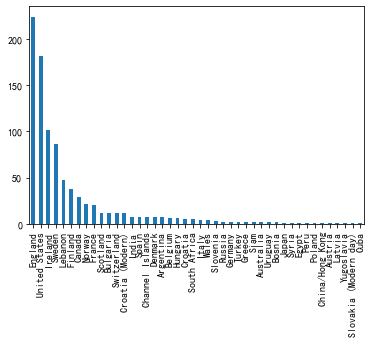

In [34]:
# 读取csv文件
data_2 = r'data\titanic_passgener_list.csv'
df = pd.read_csv(data_2, encoding="ANSI")
result = df.loc[1:891, 'country'].value_counts()

# 打印结果
print(result)
result.plot(kind='bar')